# Mount drive


In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


# Imports

In [2]:
%cd /content/drive/MyDrive/3A ECM/Projet/Premier modèle/test du package

/content/drive/MyDrive/3A ECM/Projet/Premier modèle/test du package


In [3]:
import torch
import pickle
import itertools
import torch.nn as nn
import matplotlib.pyplot as plt

In [4]:
from few_shot_auto_encoder.datasets import load_mnist, load_omniglot
from few_shot_auto_encoder import AutoEncoder, STTrainer, FullLearning_Regular

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Configuration

## Global variables

In [6]:
save_figures = False
use_cuda = True and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
spatial_transformer_path = "mnist_spatial_transformer.pickle"

## Data loading

In [7]:
train_loader, test_loader, nb_classes = load_mnist()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [8]:
input_size = train_loader.dataset[0][0].size()[-1]

In [9]:
# Filter MNIST dataset
train_index = train_loader.dataset.targets != 9
test_index = test_loader.dataset.targets == 9

train_loader.dataset.targets = train_loader.dataset.targets[train_index]
train_loader.dataset.data = train_loader.dataset.data[train_index]
test_loader.dataset.targets = test_loader.dataset.targets[test_index]
test_loader.dataset.data = test_loader.dataset.data[test_index]

# Spatial Transformer training

In [ ]:
model = STTrainer(input_size, num_classes=nb_classes).to(device)

model.train_model(train_loader, epochs=15)

KeyboardInterrupt: ignored

In [ ]:
for images, target in test_loader:
  model.spatial_transformer.visualize(images.to(device))
  break

In [ ]:
model.save_st(path=spatial_transformer_path)

# Spatial Transformer loading

In [10]:
with open(spatial_transformer_path, "rb") as file:
    spatial_transformer = pickle.load(file)

RuntimeError: ignored

In [ ]:
for images, target in test_loader:
  spatial_transformer.visualize(images.to(device))
  break

# Model definition

## Parameters 


In [ ]:
latent_size = 10
NFilters= [32]
KS = [7]

## Encoder

In [ ]:
encoder = AutoEncoder(input_size=input_size,
                      latent_size=latent_size, 
                      kernel_size=7, 
                      n_filters=NFilters, 
                      kernel_sizes=KS,
                      reconstruction_loss=nn.MSELoss(),
                      spatial_transformer=spatial_transformer).to(device)

Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1))


In [ ]:
print(encoder)

AutoEncoder(
  (conv): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1))
  )
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 10, kernel_size=(7, 7), stride=(1, 1))
  (conv2_bn): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (binary_act): DeterministicBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (linear_sp): Sparsify1D_kactiveIOnline()
  (deconv2): ConvTranspose2d(10, 1, kernel_size=(13, 13), stride=(1, 1), bias=False)
  (spatial_transformer): SpatialTransformer(
    (localization): Sequential(
      (0): Conv2d(1, 8, kernel_size=(7, 7), stride=(1, 1))
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): ReLU(inplace=True)
      (3): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False

# Training

Epoch [1/3], Step[169/845] (20%), total_loss 0.4785, rec_loss: 0.4257, genspars: 0.0451, encospars: 0.0076, averageActivated: 0.4257155954837799
Epoch [1/3], Step[338/845] (40%), total_loss 0.4593, rec_loss: 0.4085, genspars: 0.0434, encospars: 0.0074, averageActivated: 0.4085005819797516
Epoch [1/3], Step[507/845] (60%), total_loss 0.4638, rec_loss: 0.4130, genspars: 0.0431, encospars: 0.0077, averageActivated: 0.4129554331302643
Epoch [1/3], Step[676/845] (80%), total_loss 0.4667, rec_loss: 0.4152, genspars: 0.0439, encospars: 0.0076, averageActivated: 0.4152301251888275
Epoch [1/3], Step[845/845] (100%), total_loss 0.4414, rec_loss: 0.3916, genspars: 0.0422, encospars: 0.0075, averageActivated: 0.39164891839027405


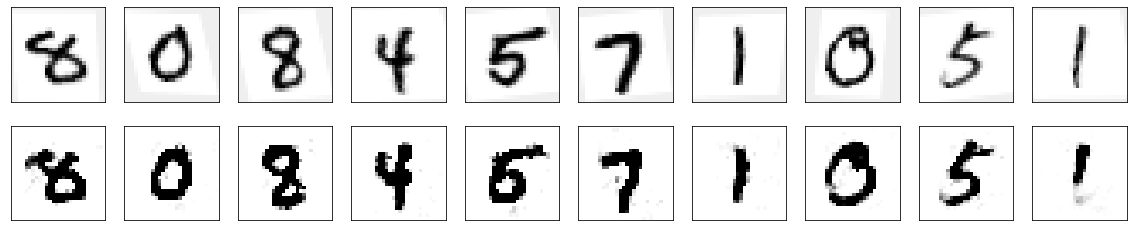

Epoch [2/3], Step[169/845] (20%), total_loss 0.4704, rec_loss: 0.4191, genspars: 0.0438, encospars: 0.0075, averageActivated: 0.4191056191921234
Epoch [2/3], Step[338/845] (40%), total_loss 0.4490, rec_loss: 0.3979, genspars: 0.0435, encospars: 0.0076, averageActivated: 0.397932767868042
Epoch [2/3], Step[507/845] (60%), total_loss 0.4774, rec_loss: 0.4283, genspars: 0.0414, encospars: 0.0077, averageActivated: 0.42833757400512695
Epoch [2/3], Step[676/845] (80%), total_loss 0.4643, rec_loss: 0.4126, genspars: 0.0442, encospars: 0.0075, averageActivated: 0.41260433197021484
Epoch [2/3], Step[845/845] (100%), total_loss 0.4369, rec_loss: 0.3850, genspars: 0.0445, encospars: 0.0075, averageActivated: 0.3849542737007141


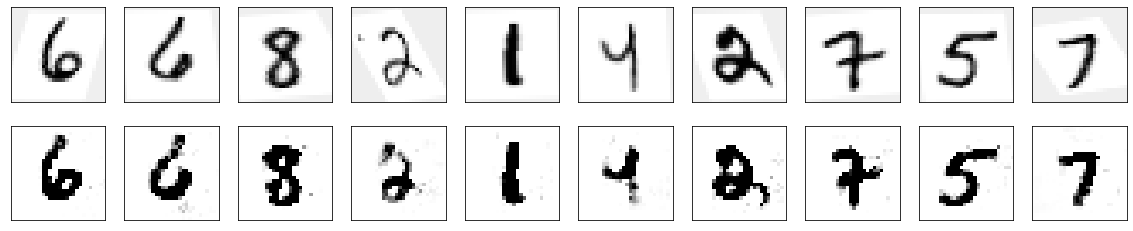

Epoch [3/3], Step[169/845] (20%), total_loss 0.4668, rec_loss: 0.4164, genspars: 0.0429, encospars: 0.0075, averageActivated: 0.41635459661483765
Epoch [3/3], Step[338/845] (40%), total_loss 0.4439, rec_loss: 0.3924, genspars: 0.0439, encospars: 0.0075, averageActivated: 0.3923618495464325
Epoch [3/3], Step[507/845] (60%), total_loss 0.4731, rec_loss: 0.4219, genspars: 0.0437, encospars: 0.0075, averageActivated: 0.4219038188457489
Epoch [3/3], Step[676/845] (80%), total_loss 0.4812, rec_loss: 0.4307, genspars: 0.0430, encospars: 0.0075, averageActivated: 0.4306984841823578
Epoch [3/3], Step[845/845] (100%), total_loss 0.4591, rec_loss: 0.4077, genspars: 0.0440, encospars: 0.0074, averageActivated: 0.4076966941356659


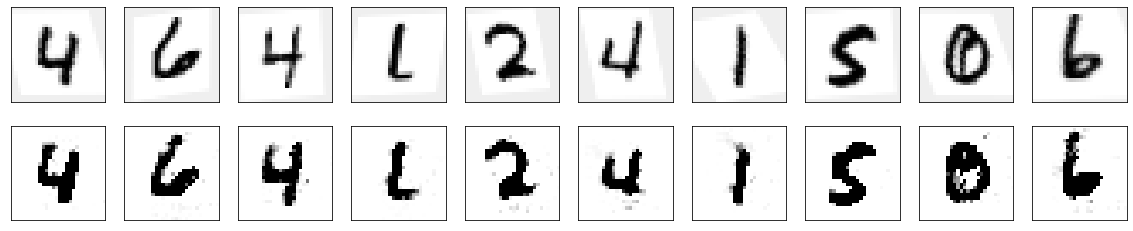

Epoch [1/3], Step[169/845] (20%), total_loss 0.3948, rec_loss: 0.3730, genspars: 0.0141, encospars: 0.0078, averageActivated: 0.37296366691589355
Epoch [1/3], Step[338/845] (40%), total_loss 0.3989, rec_loss: 0.3770, genspars: 0.0142, encospars: 0.0078, averageActivated: 0.37695878744125366
Epoch [1/3], Step[507/845] (60%), total_loss 0.4052, rec_loss: 0.3839, genspars: 0.0136, encospars: 0.0077, averageActivated: 0.38391342759132385
Epoch [1/3], Step[676/845] (80%), total_loss 0.4003, rec_loss: 0.3787, genspars: 0.0139, encospars: 0.0077, averageActivated: 0.3787476718425751
Epoch [1/3], Step[845/845] (100%), total_loss 0.3840, rec_loss: 0.3623, genspars: 0.0141, encospars: 0.0076, averageActivated: 0.36226242780685425


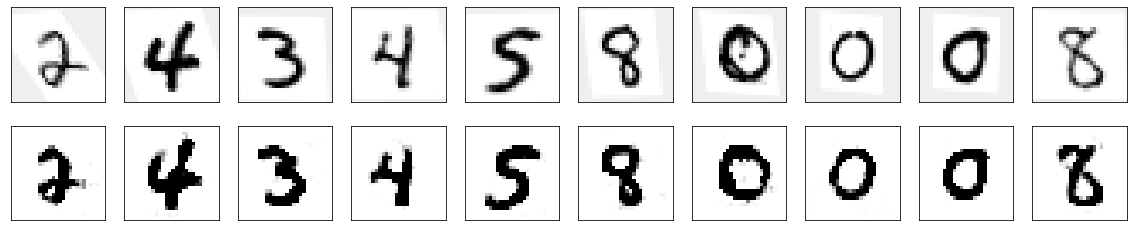

Epoch [2/3], Step[169/845] (20%), total_loss 0.3894, rec_loss: 0.3680, genspars: 0.0138, encospars: 0.0076, averageActivated: 0.3679984509944916
Epoch [2/3], Step[338/845] (40%), total_loss 0.3848, rec_loss: 0.3636, genspars: 0.0136, encospars: 0.0077, averageActivated: 0.36356407403945923
Epoch [2/3], Step[507/845] (60%), total_loss 0.3595, rec_loss: 0.3380, genspars: 0.0139, encospars: 0.0076, averageActivated: 0.3380238711833954
Epoch [2/3], Step[676/845] (80%), total_loss 0.4198, rec_loss: 0.3983, genspars: 0.0138, encospars: 0.0077, averageActivated: 0.3982827663421631
Epoch [2/3], Step[845/845] (100%), total_loss 0.3801, rec_loss: 0.3584, genspars: 0.0140, encospars: 0.0076, averageActivated: 0.35843539237976074


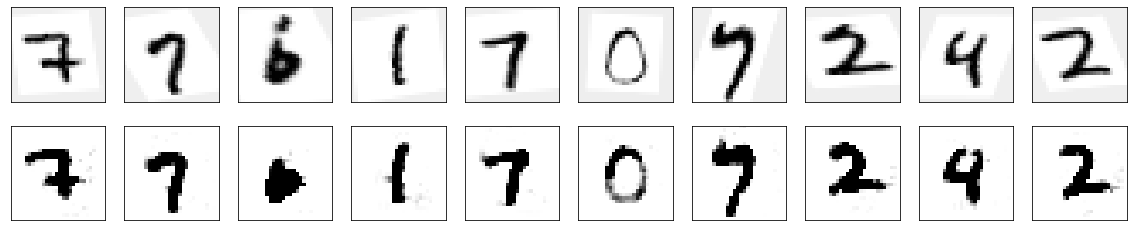

Epoch [3/3], Step[169/845] (20%), total_loss 0.3770, rec_loss: 0.3555, genspars: 0.0139, encospars: 0.0076, averageActivated: 0.3554507791996002
Epoch [3/3], Step[338/845] (40%), total_loss 0.3980, rec_loss: 0.3769, genspars: 0.0136, encospars: 0.0076, averageActivated: 0.37685340642929077
Epoch [3/3], Step[507/845] (60%), total_loss 0.3816, rec_loss: 0.3605, genspars: 0.0136, encospars: 0.0075, averageActivated: 0.360538512468338
Epoch [3/3], Step[676/845] (80%), total_loss 0.4006, rec_loss: 0.3800, genspars: 0.0129, encospars: 0.0077, averageActivated: 0.3800203502178192
Epoch [3/3], Step[845/845] (100%), total_loss 0.4006, rec_loss: 0.3791, genspars: 0.0137, encospars: 0.0078, averageActivated: 0.37909239530563354


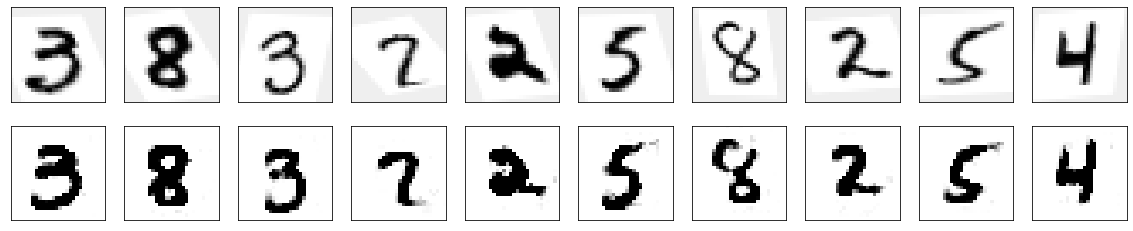

Epoch [1/5], Step[169/845] (20%), total_loss 0.3609, rec_loss: 0.3456, genspars: 0.0076, encospars: 0.0077, averageActivated: 0.34556394815444946
Epoch [1/5], Step[338/845] (40%), total_loss 0.3522, rec_loss: 0.3373, genspars: 0.0071, encospars: 0.0077, averageActivated: 0.337289035320282
Epoch [1/5], Step[507/845] (60%), total_loss 0.3708, rec_loss: 0.3562, genspars: 0.0068, encospars: 0.0078, averageActivated: 0.3562297224998474
Epoch [1/5], Step[676/845] (80%), total_loss 0.3546, rec_loss: 0.3404, genspars: 0.0066, encospars: 0.0077, averageActivated: 0.3403815031051636
Epoch [1/5], Step[845/845] (100%), total_loss 0.3418, rec_loss: 0.3277, genspars: 0.0064, encospars: 0.0077, averageActivated: 0.3276767432689667


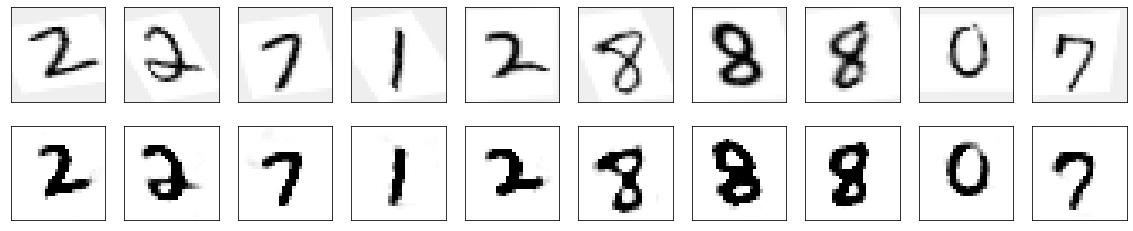

Epoch [2/5], Step[169/845] (20%), total_loss 0.3736, rec_loss: 0.3596, genspars: 0.0063, encospars: 0.0077, averageActivated: 0.35957854986190796
Epoch [2/5], Step[338/845] (40%), total_loss 0.3638, rec_loss: 0.3498, genspars: 0.0062, encospars: 0.0078, averageActivated: 0.3498067855834961
Epoch [2/5], Step[507/845] (60%), total_loss 0.3490, rec_loss: 0.3352, genspars: 0.0061, encospars: 0.0077, averageActivated: 0.33522161841392517
Epoch [2/5], Step[676/845] (80%), total_loss 0.3759, rec_loss: 0.3621, genspars: 0.0060, encospars: 0.0078, averageActivated: 0.3621329963207245
Epoch [2/5], Step[845/845] (100%), total_loss 0.3471, rec_loss: 0.3334, genspars: 0.0060, encospars: 0.0077, averageActivated: 0.3334085941314697


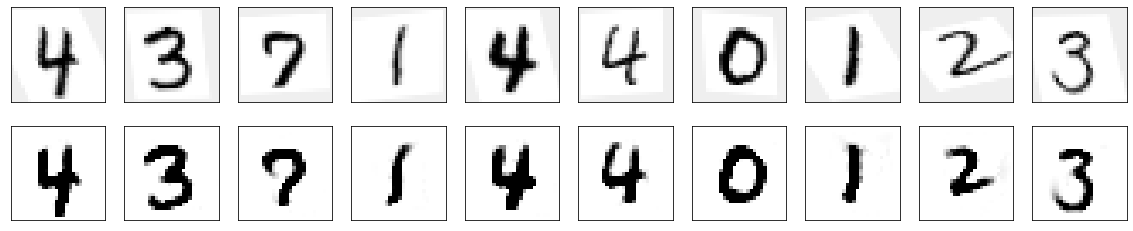

Epoch [3/5], Step[169/845] (20%), total_loss 0.3802, rec_loss: 0.3665, genspars: 0.0060, encospars: 0.0077, averageActivated: 0.3664855659008026
Epoch [3/5], Step[338/845] (40%), total_loss 0.3737, rec_loss: 0.3600, genspars: 0.0059, encospars: 0.0078, averageActivated: 0.36000823974609375
Epoch [3/5], Step[507/845] (60%), total_loss 0.3689, rec_loss: 0.3553, genspars: 0.0058, encospars: 0.0078, averageActivated: 0.35532328486442566
Epoch [3/5], Step[676/845] (80%), total_loss 0.3695, rec_loss: 0.3558, genspars: 0.0059, encospars: 0.0078, averageActivated: 0.35583990812301636
Epoch [3/5], Step[845/845] (100%), total_loss 0.3693, rec_loss: 0.3557, genspars: 0.0058, encospars: 0.0078, averageActivated: 0.3557131588459015


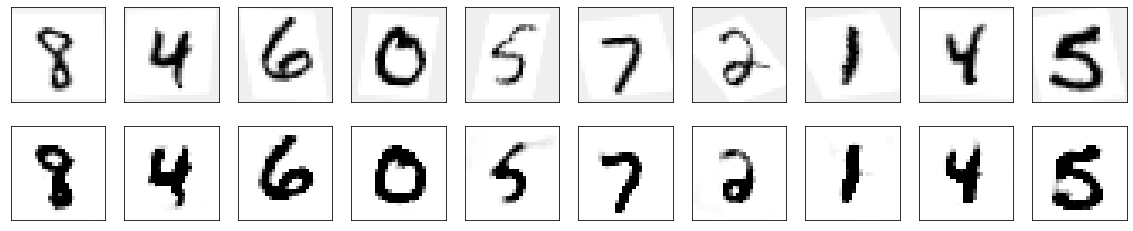

Epoch [4/5], Step[169/845] (20%), total_loss 0.3899, rec_loss: 0.3764, genspars: 0.0057, encospars: 0.0078, averageActivated: 0.37639790773391724
Epoch [4/5], Step[338/845] (40%), total_loss 0.3831, rec_loss: 0.3696, genspars: 0.0057, encospars: 0.0078, averageActivated: 0.3696468472480774
Epoch [4/5], Step[507/845] (60%), total_loss 0.3882, rec_loss: 0.3748, genspars: 0.0056, encospars: 0.0077, averageActivated: 0.37480154633522034
Epoch [4/5], Step[676/845] (80%), total_loss 0.3647, rec_loss: 0.3513, genspars: 0.0057, encospars: 0.0078, averageActivated: 0.3513229787349701
Epoch [4/5], Step[845/845] (100%), total_loss 0.3782, rec_loss: 0.3648, genspars: 0.0057, encospars: 0.0078, averageActivated: 0.36482954025268555


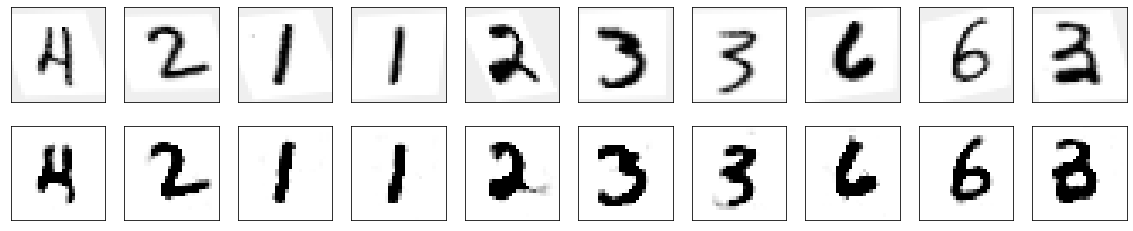

Epoch [5/5], Step[169/845] (20%), total_loss 0.3906, rec_loss: 0.3773, genspars: 0.0056, encospars: 0.0077, averageActivated: 0.3773007094860077
Epoch [5/5], Step[338/845] (40%), total_loss 0.3698, rec_loss: 0.3566, genspars: 0.0055, encospars: 0.0077, averageActivated: 0.35663774609565735
Epoch [5/5], Step[507/845] (60%), total_loss 0.3775, rec_loss: 0.3642, genspars: 0.0055, encospars: 0.0078, averageActivated: 0.3641943335533142
Epoch [5/5], Step[676/845] (80%), total_loss 0.3678, rec_loss: 0.3546, genspars: 0.0055, encospars: 0.0077, averageActivated: 0.3546096384525299
Epoch [5/5], Step[845/845] (100%), total_loss 0.3844, rec_loss: 0.3712, genspars: 0.0055, encospars: 0.0078, averageActivated: 0.37116220593452454


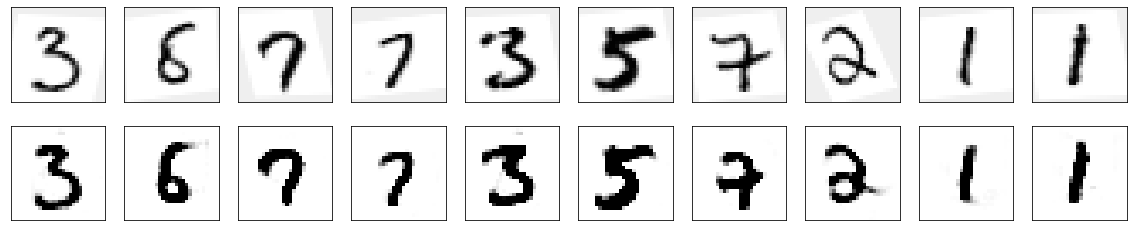

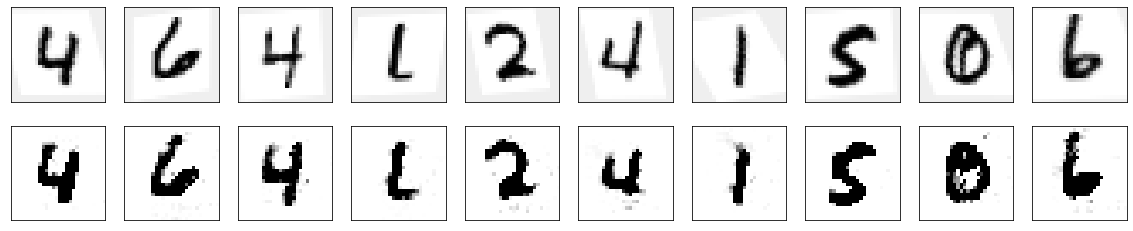

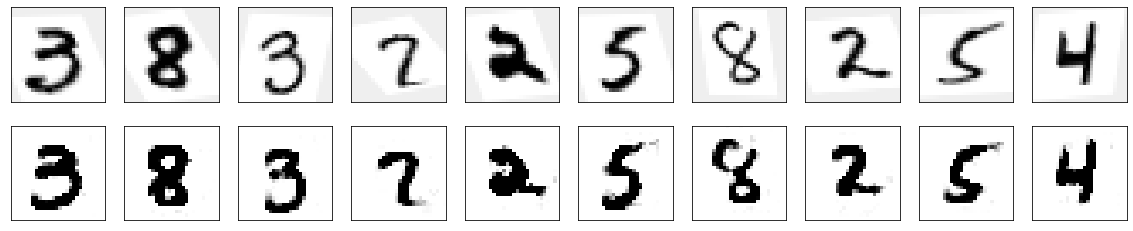

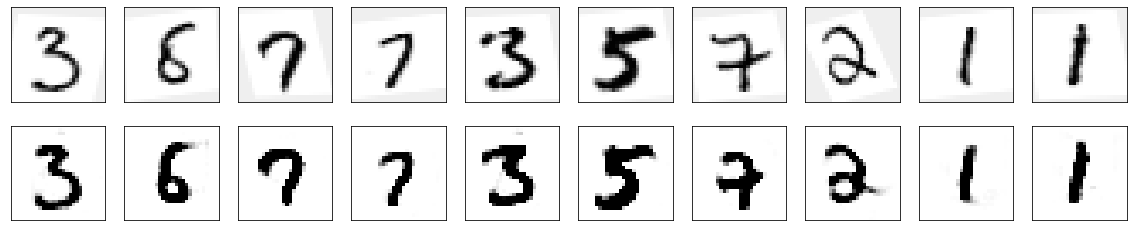

In [ ]:
AddLRs = {
    "genspars": 1, 
    "encspars": 0.1,
    "lpercomp": 0,
    "pairwise": 0
    }

learning_rates = [0.01, 0.001, 0.0001]
numbers_of_epochs = [3, 3, 5] 
mode = "WTA"
nbmax = 2

full_learning_regular(encoder=encoder,
                     device=device,
                     train_loader=train_loader,
                     test_loader=test_loader,
                     num_epochs=numbers_of_epochs,
                     LRs=learning_rates,
                     mode=mode,
                     AddLRs=AddLRs,
                     WithPairwise=False,
                     nbmax=nbmax,
                     early_stopping=False)

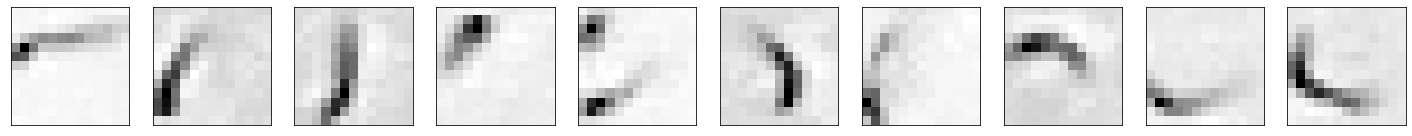

In [ ]:
encoder.visualize_filters()

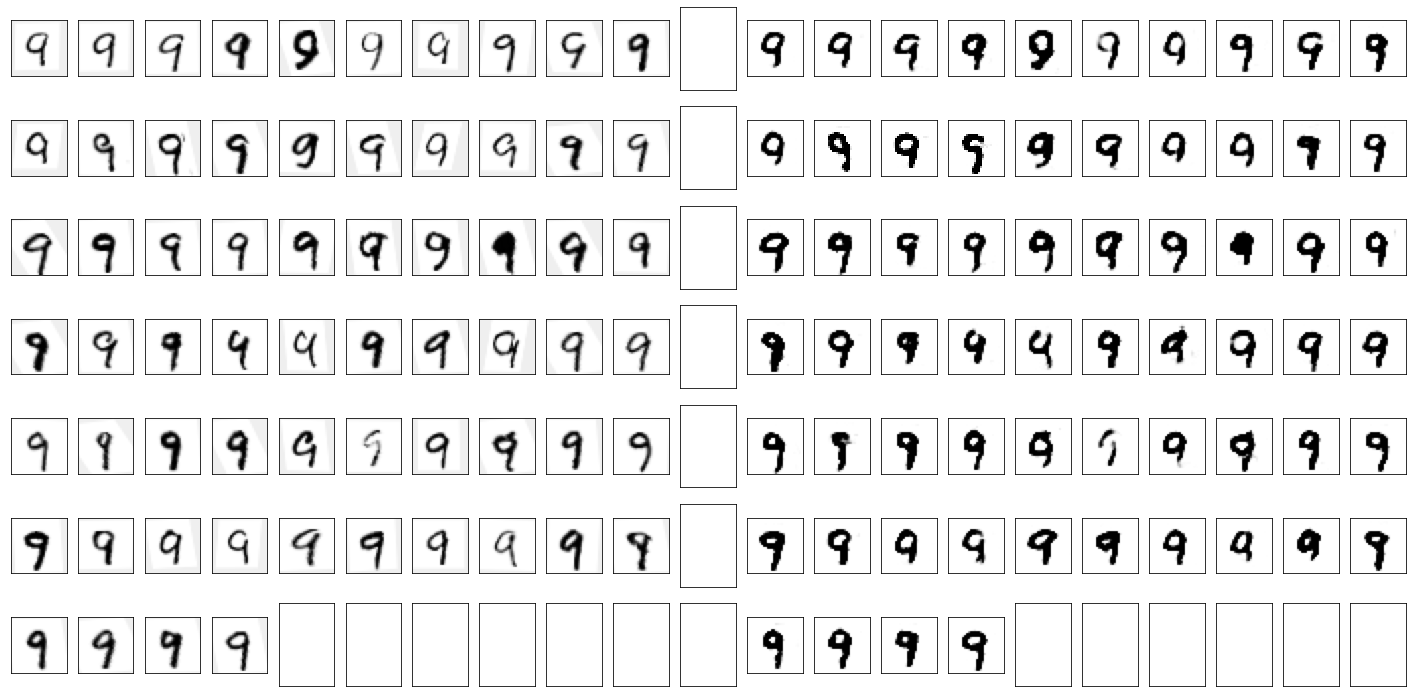

In [ ]:
for images, target in test_loader:
  encoder.visualize(images.to(device), nbmax)
  break

# Image generation


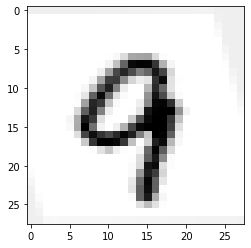

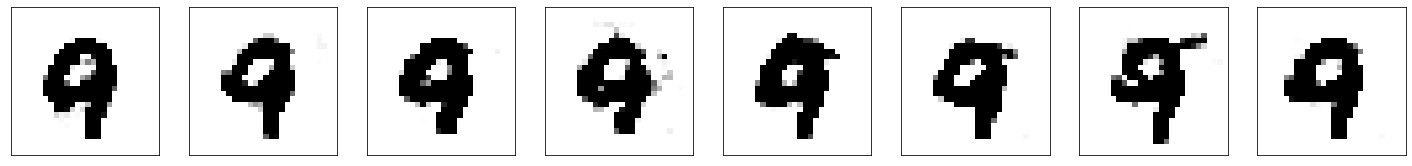

In [ ]:
for images, target in test_loader:
  image = images[0][None, ...].to(device)
  encoder.generate(image, mode=mode, nbmax=nbmax, number_of_images=8, visualize=True)
  break 